# Data Analysis

### Import Dependencies

In [18]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
import soundfile as sf

### Loading Data
Currently, I will be using ASVspoof 2019 dataset which is a dataset containing real (bonafide) and fake (spoofed) speech generated from a variety of methods such as TTS or vocoding. The audio dataset labels real speech with the key "bonafide" and fake speech with the key "spoof".

In [19]:
train_CSV = '../data/ASVspoof_Dataset/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt'
train_directory = '../data/ASVspoof_Dataset/ASVspoof2019_LA_train/flac/'

df = pd.read_csv(train_CSV, delimiter=" ", names=["SPEAKER_ID", "AUDIO_FILE_NAME", "SYSTEM_ID", "-", "KEY"])
df.head(5)

,SPEAKER_ID,AUDIO_FILE_NAME,SYSTEM_ID,-,KEY
0,LA_0079,LA_T_1138215,-,-,bonafide
1,LA_0079,LA_T_1271820,-,-,bonafide
2,LA_0079,LA_T_1272637,-,-,bonafide
3,LA_0079,LA_T_1276960,-,-,bonafide
4,LA_0079,LA_T_1341447,-,-,bonafide


### Analysis
We can see that there is nearly ten times as many fake audio files than real audio files. (This is likely due to it being harder to make human speech datasets compared to computer generated ones)

In [20]:
df['KEY'].value_counts()

KEY
spoof       22800
bonafide     2580
Name: count, dtype: int64

### Sample of the Audio
Let's hear a sample of a real and fake audio file.

In [21]:
real_file_path = train_directory + "LA_T_1138215.flac"
fake_file_path = train_directory + "LA_T_1004644.flac"

audio_data, sample_rate = sf.read(real_file_path)
print("Real Audio:")
display(Audio(audio_data, rate=sample_rate))

audio_data, sample_rate = sf.read(fake_file_path)
print("Fake Audio:")
display(Audio(audio_data, rate=sample_rate))


Real Audio:


Fake Audio:


### Extracting a Mel spectrogram
After extracting the spectrograms, we can see that the real audio has a lot more variation in pitch that the fake audio.

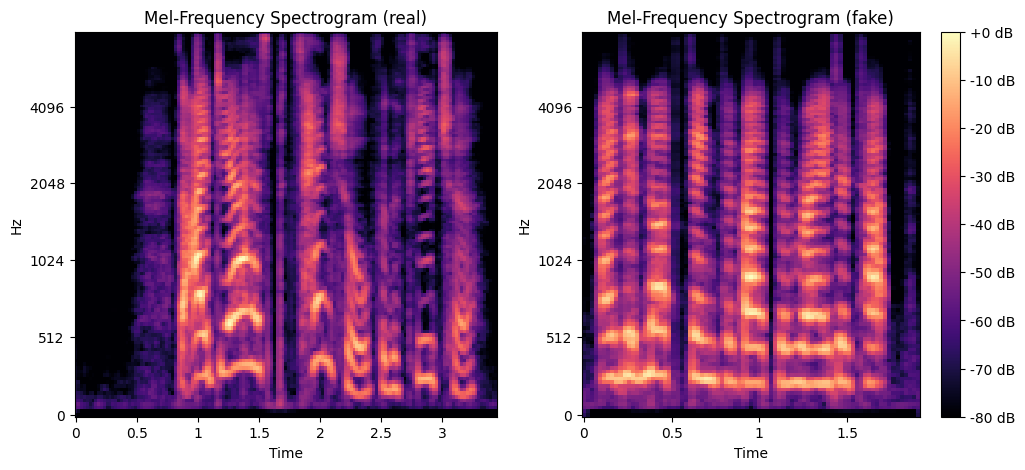

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

def plot_mfcc(file_name, col, title='Mel-frequency spectrogram', colorbar=False):
    file_path =  train_directory + file_name + ".flac"
    y, sr = librosa.load(file_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax[col])
    if colorbar:
        fig.colorbar(img, ax=ax[col], format='%+2.0f dB')
    ax[col].set(title=title)

plot_mfcc("LA_T_1138215", 0, "Mel-Frequency Spectrogram (real)", False)
plot_mfcc("LA_T_1004644", 1, "Mel-Frequency Spectrogram (fake)", True)

